## Import Dataset

In [1]:
from teaspoon.ML import load_datasets
import numpy as np
import pandas as pd
mnist = load_datasets.mnist()
mnist

,zero_dim_rtl,zero_dim_ltr,zero_dim_btt,zero_dim_ttb,one_dim_rtl,one_dim_ltr,one_dim_btt,one_dim_ttb,labels
0,"[[23.0, 50.0], [13.0, 20.0]]","[[24.0, 50.0], [11.0, 21.0]]","[[24.0, 50.0], [8.0, 9.0]]","[[23.0, 50.0]]",[],[],[],[],5
1,"[[22.0, 50.0]]","[[22.0, 50.0]]","[[23.0, 50.0]]","[[24.0, 50.0]]","[[0.0, 8.0]]","[[0.0, 8.0]]","[[0.0, 9.0]]","[[0.0, 8.0]]",0
2,"[[22.0, 50.0]]","[[25.0, 50.0]]","[[24.0, 50.0], [15.0, 16.0]]","[[23.0, 50.0], [13.0, 22.0]]",[],[],[],[],4
3,"[[21.0, 50.0]]","[[20.0, 50.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]",[],[],[],[],1
4,"[[20.0, 50.0], [16.0, 18.0]]","[[22.0, 50.0], [14.0, 15.0]]","[[26.0, 50.0]]","[[21.0, 50.0]]","[[0.0, 9.0]]","[[0.0, 12.0]]","[[0.0, 9.0]]","[[0.0, 14.0]]",9
...,...,...,...,...,...,...,...,...,...
59995,"[[23.0, 50.0], [16.0, 17.0]]","[[22.0, 50.0], [16.0, 18.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]","[[0.0, 13.0], [0.0, 7.0]]","[[0.0, 13.0], [0.0, 9.0]]","[[0.0, 16.0], [0.0, 6.0]]","[[0.0, 17.0], [0.0, 5.0]]",8
59996,"[[21.0, 50.0], [17.0, 18.0]]","[[24.0, 50.0], [12.0, 18.0], [9.0, 17.0]]","[[23.0, 50.0]]","[[24.0, 50.0], [7.0, 10.0]]",[],[],[],[],3
59997,"[[24.0, 50.0], [13.0, 18.0]]","[[23.0, 50.0], [12.0, 20.0]]","[[24.0, 50.0]]","[[23.0, 50.0], [5.0, 7.0]]",[],[],[],[],5
59998,"[[23.0, 50.0], [8.0, 21.0]]","[[22.0, 50.0], [11.0, 15.0]]","[[21.0, 50.0]]","[[26.0, 50.0], [8.0, 15.0]]","[[0.0, 17.0]]","[[0.0, 8.0]]","[[0.0, 15.0]]","[[0.0, 10.0]]",6


### Fill Missing Data in One Dimension

In [2]:
def fill_missing(dim_1):
    for i in range(0, len(dim_1)):
        if len(dim_1[i])== 0:
            dim_1[i] = np.array([[0,.01]])
        else: 
            dim_1[i] = dim_1[i]
    return dim_1

In [3]:
import warnings
warnings.filterwarnings('ignore')
mnist['one_dim_rtl'] = fill_missing(mnist['one_dim_rtl'])
mnist['one_dim_ltr'] = fill_missing(mnist['one_dim_ltr'])
mnist['one_dim_btt'] = fill_missing(mnist['one_dim_btt'])
mnist['one_dim_ttb'] = fill_missing(mnist['one_dim_ttb'])

### Choose Dimension for Timing Test

In [4]:
def train_test_split_sklearn(DgmsFD, labels_col, train_size=.5, seed=12):
    from sklearn.model_selection import train_test_split
    labels = DgmsFD[labels_col]
    training_dgms, testing_dgms = train_test_split(DgmsFD, train_size=train_size, random_state=seed, stratify=labels)
    return training_dgms.reset_index(), testing_dgms.reset_index()

In [62]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = .05)
xdgm0_train = dgms_train['zero_dim_rtl']
xdgm0_test = dgms_test['zero_dim_rtl']
xdgm1_train = dgms_train['one_dim_rtl']
xdgm1_test = dgms_test['one_dim_rtl']
labels_train = dgms_train['labels']
labels_test = dgms_test['labels']

### Load original persistence images method function from teaspoon

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from persim import PersistenceImager
import math
from math import pi
from numpy.linalg import norm as lnorm
from sympy.abc import t
from sympy import Piecewise
from sympy import diff, integrate
from itertools import combinations

def F_Image(PD1, PS, var, plot, D_Img=[], pers_imager=None, training=True):
    

    output = {}
    # number of persistence diagrams
    N1 = len(PD1)

    if training == True:
        # adjust the image parameters and compute images
        pers_imager = PersistenceImager()
        pers_imager.pixel_size = PS
        pers_imager.kernel_params = {'sigma': var}

        PDs = PD1.tolist()
        pers_imager.fit(PDs, skew=True)
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]
    else:
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]

    # generate feature matrix
    feature_PI = np.zeros(
        (N1, len(pers_img[0][:, 0])*len(pers_img[0][0, :])))
    for i in range(N1):
        feature_PI[i, :] = pers_img[i].flatten()

    # plot all images or images of certain persistence diagrams
    if plot == True:
        fig = []
        if D_Img == []:
            D_Img = np.arange(1, 2, 1)
        for i in range(len(D_Img)):
            plt.figure()
            ax = plt.gca()
            pimgr = PersistenceImager()
            pimgr.pixel_size = PS
            pimgr.kernel_params = {'sigma': var}
            pimgr.fit(PD1[D_Img[i]-1], skew=True)
            imgs = pimgr.transform(PD1[D_Img[i]-1], skew=True)
            pers_imager.plot_image(imgs, ax)
            fig.append(plt.gcf())
        output['figures'] = fig

    output['F_Matrix'] = feature_PI
    output['pers_imager'] = pers_imager

    return output

In [45]:
import multiprocessing
cpu_count = multiprocessing.cpu_count()
print(cpu_count)

@jit
def jit_F_Image(PD1, PS, var, plot, D_Img=[], pers_imager=None, training=True):
    

    output = {}
    # number of persistence diagrams
    N1 = len(PD1)

    if training == True:
        # adjust the image parameters and compute images
        pers_imager = PersistenceImager()
        pers_imager.pixel_size = PS
        pers_imager.kernel_params = {'sigma': var}

        PDs = PD1.tolist()
        pers_imager.fit(PDs, skew=True)
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]
    else:
        pers_img = [pers_imager.transform(PD1[i], skew=True) for i in np.arange(0, N1, 1)]

    # generate feature matrix
    feature_PI = np.zeros(
        (N1, len(pers_img[0][:, 0])*len(pers_img[0][0, :])))
    for i in range(N1):
        feature_PI[i, :] = pers_img[i].flatten()

    # plot all images or images of certain persistence diagrams
    if plot == True:
        fig = []
        if D_Img == []:
            D_Img = np.arange(1, 2, 1)
        for i in range(len(D_Img)):
            plt.figure()
            ax = plt.gca()
            pimgr = PersistenceImager()
            pimgr.pixel_size = PS
            pimgr.kernel_params = {'sigma': var}
            pimgr.fit(PD1[D_Img[i]-1], skew=True)
            imgs = pimgr.transform(PD1[D_Img[i]-1], skew=True, njobs=cpu_count)
            pers_imager.plot_image(imgs, ax)
            fig.append(plt.gcf())
        output['figures'] = fig

    output['F_Matrix'] = feature_PI
    output['pers_imager'] = pers_imager

    return output

8


In [63]:
pers_imager = PersistenceImager()
pers_imager.pixel_size = .1
pers_imager.kernel_params = {'sigma': 1}

pers_imager.fit(xdgm0_train, skew=True)
imgs = pers_imager.transform(xdgm0_train, n_jobs=cpu_count)
len(imgs)

3000

In [65]:
%timeit imgs = pers_imager.transform(xdgm0_train, n_jobs=cpu_count)
%timeit imgs = pers_imager.transform(xdgm0_train, n_jobs=1)

In [46]:
output0 = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
output1 = jit_F_Image(xdgm0_train, PS=.1, var=1, plot = False, training=True)

In [47]:
%timeit output0 = F_Image(xdgm0_train, PS=.1, var=1, plot=False, training=True)
%timeit output1 = jit_F_Image(xdgm0_train, PS=.1, var=1, plot = False, training=True)

17.6 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


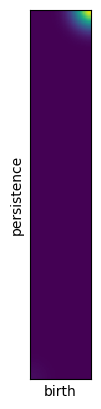

In [37]:
output1 = F_Image(xdgm0_train, PS=.1, var=1, plot=True, training=True, pers_imager=pi)

In [39]:
output0

{'figures': [<Figure size 640x480 with 1 Axes>],
 'F_Matrix': array([[9.50975080e-046, 9.41520563e-046, 9.22892583e-046, ...,
         3.54494212e-013, 2.92543767e-013, 2.44360088e-013],
        [7.77072155e-286, 1.88306132e-284, 4.51779957e-283, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [4.27383805e-046, 5.16731949e-046, 6.18547753e-046, ...,
         0.00000000e+000, 2.77555756e-015, 0.00000000e+000],
        ...,
        [2.40851608e-041, 4.34281236e-041, 7.75270381e-041, ...,
         2.27318164e-011, 1.71795911e-011, 1.28630440e-011],
        [1.73933013e-262, 2.31397184e-261, 3.04785178e-260, ...,
         3.72541997e-011, 2.08723039e-011, 1.15767396e-011],
        [1.96092280e-048, 2.89530688e-048, 4.23242581e-048, ...,
         8.05355782e-013, 4.07007761e-013, 2.04947170e-013]]),
 'pers_imager': PersistenceImager(birth_range=(0.0, 26.0), pers_range=(1.0, 33.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel

Optimized with Numba

In [8]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi
from numba import jit
import time

@jit
def optimizedKernelMethod(perDgm1, perDgm2, sigma):
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = perDgm1[i]
        p = np.reshape(p, (2, 1))
        for j in range(0, L2):
            q = perDgm2[j]
            q = np.reshape(q, (2, 1))
            q_bar = np.zeros((2, 1))
            q_bar[0] = q[1]
            q_bar[1] = q[0]
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(math.pow(dist1, 2))/(8*sigma)) - \
                np.exp(-(math.pow(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

@jit
def optimized_heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(optimizedKernelMethod(dgm0, dgm0, sigma) + optimizedKernelMethod(dgm1, dgm1, sigma) - 2*optimizedKernelMethod(dgm0, dgm1, sigma))

@jit
def optimized_kernel_features(train, s):
    n_train = len(train)
    X_train_features = np.zeros((n_train, n_train))
    
    for i in range(0,n_train):
        for j in range(0,i):
            dgm0 = train[i]
            dgm1 = train[j]
            hka = optimized_heat_kernel_distance(dgm0, dgm1, sigma = s) 
            X_train_features[i,j] = hka
            X_train_features[j,i] = hka

    return X_train_features

Parallel with jit

In [37]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi
from numba import jit
import time


@jit(nopython=True)
def par_optimized_kernel_features(train, s):
    n_train = len(train)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

    return result

In [32]:
from numba import guvectorize
@guvectorize(["void(float64[:,:], float64[:], float64, float64[:,:])",],"(m,n),(p),()->(p,p)", target='parallel')
def parallel_kernel_features_train(train, dummy, s, result):
    n_train = len(dummy)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [33]:
from numba import guvectorize
@guvectorize(["void(float64[:,:], float64[:], float64, float64[:,:])",],"(m,n),(p),()->(p,p)", target='cpu')
def gu_kernel_features_train(train, dummy, s, result):
    n_train = len(dummy)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [13]:
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([])
    n = len(dgm)
    for i in range(0,n):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    return dgm_reshape

First run to compile

In [39]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = 10, seed=1)
train_test = np.array(dgms_train['zero_dim_rtl'])
X_train_features = kernel_features(np.array(train_test), s = .3)
X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
dummy_train = np.arange(len(train_test), dtype=np.float64)
train = reshape_persistence_diagrams(train_test)
result = parallel_kernel_features_train(train, dummy_train, .3)
#X_train_features = par_optimized_kernel_features(np.array(train_test), s = .3)

### Loop for random samples and timing

In [45]:
seed = [0,1,2,3,4,5,6,7,8,9]
train_size = [.001, .005, .01, .05] # .01, .05]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        dummy_train = np.arange(len(xdgm0_train), dtype=np.float64)
        train = reshape_persistence_diagrams(xdgm0_train)
        timing[i,0] += len(xdgm0_train)

        start = time.time()
        result1 = gu_kernel_features_train(train, dummy_train, .3)
        end = time.time()-start
        timing[i,1] +=end

        start = time.time()
        X_train_features = optimized_kernel_features(xdgm0_train, s = .3)
        end = time.time()-start
        timing[i,2] +=end
        start = time.time()
        result3 = parallel_kernel_features_train(train, dummy_train, .3)
        end = time.time()-start
        timing[i,3] +=end
    print("Finished Training ", i)
timing = pd.DataFrame(timing/10)
timing.columns=['Observations', 'guvectorize', 'Jit optimized', 'Vectorized and Threading']
print(timing)

Finished Training  0
Finished Training  1
Finished Training  2


Plot Timing

In [ ]:
timing.plot()

In [57]:
seed = [0,1,2,3,4,5,6,7,8,9]
train_size = [.001, .005, .01, .05]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        timing[i,0] += len(xdgm0_train)
        start = time.time()
        X_train_features1 = kernel_features(xdgm0_train, s = .3)
        end = time.time()-start
        timing[i,1] +=end
        start = time.time()
        X_train_features = optimized_kernel_features(xdgm0_train, s = .3)
        end = time.time()-start
        timing[i,2] +=end
        dummy_train = np.arange(len(xdgm0_train), dtype=np.float64)
        train = reshape_persistence_diagrams(xdgm0_train)
        start = time.time()
        result3 = parallel_kernel_features_train(train, dummy_train, .3)
        end = time.time()-start
        timing[i,3] +=end
    print("Finished Training ", i)
timing = pd.DataFrame(timing/10)
timing.columns=['Observations', 'Original', 'Jit optimized', 'Vectorized and Threading']
print(timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
   Observations    Original  Jit optimized  Vectorized and Threading
0          60.0    0.104926       0.010555                  0.001208
1         300.0    2.637221       0.252662                  0.062772
2         600.0   10.669852       1.033499                  0.413544
3        3000.0  270.665288      27.861426                 46.286630


In [47]:

print("Threading layer chosen: %s" % threading_layer())
print(config.NUMBA_NUM_THREADS)

Threading layer chosen: workqueue
8


In [137]:
train_test = xdgm0_train[0:200]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
dummy_train = np.arange(len(train_test), dtype=np.float64)
train = reshape_persistence_diagrams(train_test)
%timeit numba_kernel_features_train(train, dummy_train, .3)

1.45 s ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
120 ms ± 416 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.1 ms ± 604 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [96]:
train_test = xdgm0_train[0:300]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

3.24 s ± 41.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
272 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
263 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
train_test = xdgm0_train[0:400]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

5.79 s ± 114 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
468 ms ± 2.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
466 ms ± 774 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [98]:
train_test = xdgm0_train[0:500]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

9.06 s ± 238 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
731 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
729 ms ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [99]:
train_test = xdgm0_train[0:750]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

20.1 s ± 152 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.71 s ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.66 s ± 37.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [100]:
train_test = xdgm0_train[0:1000]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

36.9 s ± 773 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.98 s ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.97 s ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [101]:
train_test = xdgm0_train[0:1250]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

55.4 s ± 524 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.67 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.68 s ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [102]:
train_test = xdgm0_train[0:1500]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

1min 20s ± 761 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.78 s ± 81.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.81 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [103]:
train_test = xdgm0_train[0:2000]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

KeyboardInterrupt: 